In [1]:
# Data Manupulation
import numpy as np
import pandas as pd
# Plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Downloads\CreditRiskTrainData.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']

print(df.head(5)) 

print(df.ndim)

print(df.shape)

print(df.columns)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [2]:
df.isnull().sum()
# find missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
df.shape

(614, 13)

In [4]:
from collections import Counter
Counter(df['Gender'])

Counter({'Male': 489, 'Female': 112, nan: 13})

In [5]:
# Fill Empty data to Male
gender_null = df[df['Gender'].isnull()].index.tolist()
df['Gender'].iloc[gender_null] = "Male"
Counter(df['Gender'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'Male': 502, 'Female': 112})

In [6]:
df.isnull().sum()
# find missing values - Gener Missing Values are Fixed/Filled

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
pd.crosstab( df['Married'].isnull(), df['Dependents'].isnull()) 



Dependents,False,True
Married,,
False,599,12
True,0,3


In [8]:
Counter(df['Married'])

Counter({'No': 213, 'Yes': 398, nan: 3})

In [9]:
# Fill Empty data to Male
married_null = df[df['Married'].isnull()].index.tolist()
df['Married'].iloc[married_null] = "Yes"
Counter(df['Married'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'No': 213, 'Yes': 401})

In [10]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
Counter(df['Dependents'])

Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})

In [12]:
pd.crosstab( df['Married'].isnull(), df['Dependents'].isnull()) 


Dependents,False,True
Married,,
False,599,15


In [13]:
pd.crosstab( df['Married'], df['Dependents']) 

Dependents,0,1,2,3+
Married,,,,
No,171,23,8,7
Yes,174,79,93,44


In [14]:
bachelor_null = df[ (df['Married'] == "NO") & (df['Dependents'].isnull())]
df['Dependents'].iloc[bachelor_null]="0"
Counter(df['Dependents'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'0': 345, '1': 102, '2': 101, '3+': 51, nan: 15})

In [15]:
dep_null = df[df['Dependents'].isnull()].index.tolist()
df['Dependents'].iloc[dep_null] = '0'
Counter(df['Dependents'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'0': 360, '1': 102, '2': 101, '3+': 51})

In [16]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Fill Empty data to Male
Self_Employed_null = df[df['Self_Employed'].isnull()].index.tolist()
df['Self_Employed'].iloc[Self_Employed_null] = "No"
Counter(df['Self_Employed'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Counter({'No': 532, 'Yes': 82})

In [18]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
pd.crosstab( df['LoanAmount'].isnull(), df['Loan_Amount_Term'].isnull()) 

Loan_Amount_Term,False,True
LoanAmount,,
False,578,14
True,22,0


In [20]:
df.groupby(df['Loan_Amount_Term'])['LoanAmount'].mean()

Loan_Amount_Term
12.0     111.000000
36.0     117.500000
60.0     140.000000
84.0     132.250000
120.0     22.333333
180.0    147.523810
240.0    118.333333
300.0    185.153846
360.0    147.245436
480.0    151.800000
Name: LoanAmount, dtype: float64

In [21]:
pd.crosstab( df['LoanAmount'].isnull(), df['Loan_Amount_Term']) 

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
LoanAmount,,,,,,,,,,
False,1,2,2,4,3,42,3,13,493,15
True,0,0,0,0,0,2,1,0,19,0


In [22]:
df['LoanAmount'][ ( df['LoanAmount'].isnull())] = 130

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
(df['Loan_Amount_Term']).value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
df['Loan_Amount_Term'][ ( df['Loan_Amount_Term'].isnull())] = 360

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
(df['Credit_History']).value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [28]:
Counter(df['Credit_History'])

Counter({1.0: 475,
         0.0: 89,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

In [29]:
df['Credit_History'][ ( df['Credit_History'].isnull())] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
 # After Cleaning
    

In [32]:
df.shape

(614, 13)

In [33]:
dfNew = pd.get_dummies(df.drop(['Loan_ID'],axis=1) ,drop_first=True)
dfNew.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,130.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [34]:
dfNew.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [35]:
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
dfInput = dfNew.iloc[:,0:14] 
print(dfInput.head())
dfoutput = dfNew.iloc[:,-1]
print(dfoutput.head())


split = int(0.8*len(dfNew))
X_train, X_test, Y_train, Y_test = dfInput[:split], dfInput[split:], dfoutput[:split], dfoutput[split:]

model = LogisticRegression()
print(model)

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       130.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0             1.0            1            0             0             0   
1             1.0            1            1             1             0   
2             1.0            1            1             0             0   
3             1.0            1            1             0             0   
4             1.0            1            0             0             0   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0              0                       0                  0

In [36]:
from sklearn import preprocessing
from sklearn import utils

model = model.fit(X_train,Y_train )
ms = model.score(X_train,Y_train)
print("model score::",ms)

probability = model.predict_proba(X_test)
#print(probability)
print("*" * 100)
print("Confusion Matrix")
predicted = model.predict(X_test)
print(metrics.confusion_matrix(Y_test , predicted))

model score:: 0.767820773931
****************************************************************************************************
Confusion Matrix
[[20 19]
 [ 7 77]]


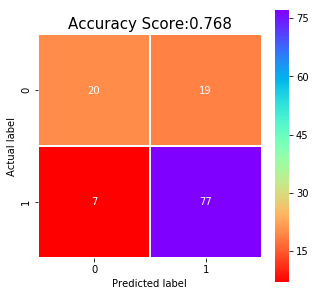

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(Y_test , predicted)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

In [38]:
from sklearn.svm import SVC
model =SVC()
model.fit(X_train,Y_train)
pred = model.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        39
          1       0.68      0.99      0.81        84

avg / total       0.46      0.67      0.55       123



[[ 0 39]
 [ 1 83]]


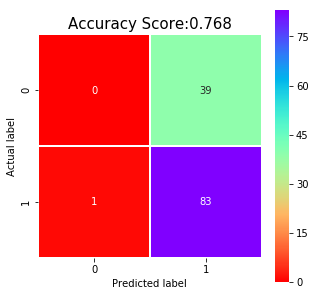

In [39]:
print(confusion_matrix(Y_test,pred))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = confusion_matrix(Y_test , pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'rainbow_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

In [40]:
from sklearn.svm import SVC
model =SVC()
from sklearn.grid_search import GridSearchCV
param_grid = { 'C':[0.001,0.01], 'gamma' :[1,0.08,0.09],'kernel':['linear'] }
grid = GridSearchCV(SVC(),param_grid, verbose=2)
grid.fit(X_train,Y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ........................ C=0.001, gamma=1, kernel=linear -  19.0s
[CV] C=0.001, gamma=1, kernel=linear .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s remaining:    0.0s


[CV] ........................ C=0.001, gamma=1, kernel=linear -  20.5s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] ........................ C=0.001, gamma=1, kernel=linear -  16.4s
[CV] C=0.001, gamma=0.08, kernel=linear ..............................
[CV] ..................... C=0.001, gamma=0.08, kernel=linear -  19.5s
[CV] C=0.001, gamma=0.08, kernel=linear ..............................
[CV] ..................... C=0.001, gamma=0.08, kernel=linear -  19.4s
[CV] C=0.001, gamma=0.08, kernel=linear ..............................
[CV] ..................... C=0.001, gamma=0.08, kernel=linear -  17.0s
[CV] C=0.001, gamma=0.09, kernel=linear ..............................
[CV] ..................... C=0.001, gamma=0.09, kernel=linear -  19.1s
[CV] C=0.001, gamma=0.09, kernel=linear ..............................
[CV] ..................... C=0.001, gamma=0.09, kernel=linear -  19.9s
[CV] C=0.001, gamma=0.09, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  6.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01], 'gamma': [1, 0.08, 0.09], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [41]:
grid.best_params_
grid.best_estimator_

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

   LoanAmount  Loan_Amount_Term
0       130.0             360.0
1       128.0             360.0
2        66.0             360.0
3       120.0             360.0
4       141.0             360.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8
8.0 701.0 0.87625
[[   8.         8.87625    9.7525  ...,  698.485    699.36125  700.2375 ]
 [   8.         8.87625    9.7525  ...,  698.485    699.36125  700.2375 ]
 [   8.         8.87625    9.7525  ...,  698.485    699.36125  700.2375 ]
 ..., 
 [   8.         8.87625    9.7525  ...,  698.485    699.36125  700.2375 ]
 [   8.         8.87625    9.7525  ...,  698.485    699.36125  700.2375 ]
 [   8.         8.87625    9.7525  ...,  698.485    699.36125  700.2375 ]] [[  11.        11.        11.      ...,   11.        11.        11.     ]
 [  11.87625   11.87625   11.87625 ...,   11.87625   11.87625   11.87625]
 [  12.7525    12.7525    12.7525  ...,   12.7525    12.7525    12.7525 ]
 ..., 
 [ 478.9175   478.9175   478.9175  ..., 

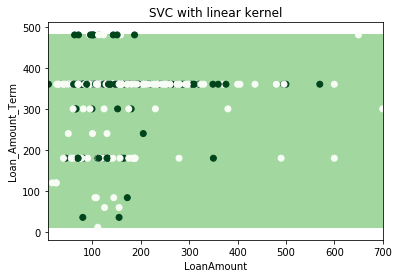

In [42]:
X = dfNew.iloc[:,2:4] 
print(X.head())
Y = dfNew.iloc[:,-1] 
print(Y.head())
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100

print(x_min, x_max, h)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx,yy)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Greens_r, alpha=0.8)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Greens_r)
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [43]:
X = dfNew.iloc[:,0:2] 
print(X.head())
Y = dfNew.iloc[:,-1] 
print(Y.head())


   ApplicantIncome  CoapplicantIncome
0             5849                0.0
1             4583             1508.0
2             3000                0.0
3             2583             2358.0
4             6000                0.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8


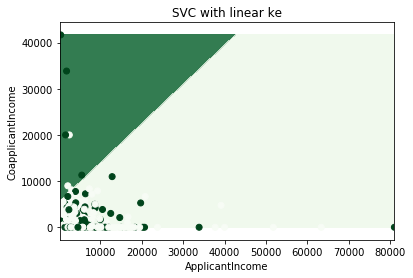

In [44]:
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100

#print(x_min, x_max, h)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Greens_r, alpha=0.8)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Greens_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear ke')
plt.show()
          

In [45]:
X = dfNew.iloc[:,[1,3] ]
print(X.head())
Y = dfNew.iloc[:,-1] 
print(Y.head())


   CoapplicantIncome  Loan_Amount_Term
0                0.0             360.0
1             1508.0             360.0
2                0.0             360.0
3             2358.0             360.0
4                0.0             360.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8


In [58]:
X = dfNew.iloc[:,[0,2]]
print(X.head())
Y = dfNew.iloc[:,-1] 
print(Y.head())
df.query('a > b')

   ApplicantIncome  LoanAmount
0             5849       130.0
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8


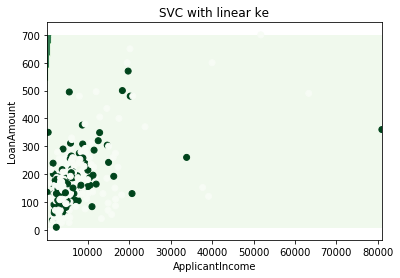

In [61]:
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100

#print(x_min, x_max, h)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Greens_r, alpha=0.8)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Greens_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear ke')
plt.show()
          
          

In [65]:
print(dfNew.shape)
dfNew2 = dfNew.query('ApplicantIncome < 16000')
print(dfNew2.shape)
X = dfNew2.iloc[:,[0,2]]
print(X.head())
Y = dfNew2.iloc[:,-1] 
print(Y.head())


(614, 15)
(590, 15)
   ApplicantIncome  LoanAmount
0             5849       130.0
1             4583       128.0
2             3000        66.0
3             2583       120.0
4             6000       141.0
0    1
1    0
2    1
3    1
4    1
Name: Loan_Status_Y, dtype: uint8


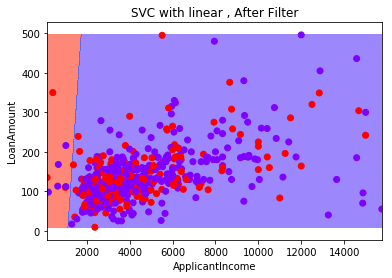

In [68]:
from sklearn import svm
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1,gamma=1).fit(X, Y)
# create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
h = (x_max / x_min)/100

#print(x_min, x_max, h)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#print(xx,yy)


Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.rainbow_r, alpha=0.6)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.rainbow_r)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear , After Filter')
plt.show()